## WORLD HEALTH ORGANIZATION(WHO) MORTALITY DATA

#### Source - http://apps.who.int/gho/data/node.main.623?lang=en & http://apps.who.int/gho/data/view.main.57020ALL?lang=en

### Questions:
##### 1. How are the mortality trends w.r.t Tuberculosis alone around the world? Which country has the highest mortality rate w.r.t Tuberculosis?
##### 2. How are the mortality trends w.r.t HIV around the world? Which country has the highest mortality rate w.r.t Tuberculosis?
##### 3. Explain on the TB mortality trends in the country with highest mortality rate w.r.t TB. Does the mortality rate of this country affect the world wide TB mortality rate? If yes, how?
##### 4. Explain on the HIV mortality trends in the country with highest mortality rate w.r.t HIV. Does the mortality rate of this country affect the world wide HIV mortality rate? If yes, how?

### Answers:
##### 1. India has the highest mortality rate w.r.t Tuberculosis between the year 2000 and 2017. Indonesia has the second highest but with only a quarter of that of India.
##### 2. South Africa is recorded to have the highest mortality rate w.r.t HIV with 700,000 people for the recorded years of 2000, 2005, 2010, 2017 combined. Nigeria goes second with 650,000 deaths even though it is a much smaller nation. Therefore, the mortality density in Nigeria is high which further infers that even though death toll in South Africa is more, the intensity was greater in Nigeria.
##### 3. In India, the country with the highest mortality rate w.r.t TB, the rates have decreased consistently from the year 2000 to 2017 without any unexpected spikes. As India contributes to most of the TB deaths in the world, the worldwide TB mortality rate is consistent with that of India's.
##### 4. In South Africa, the country with the highest mortality rate w.r.t HIV, the deaths go up from between 2000 and 2005 with almost 50% increase and from 2005, a gradual decrease in deaths can be observed. Same is the case with Nigeria, but the decrease from 2005 is not as steep as it was in South Africa - which explains how hard Nigeria was hit by HIV. As both the heavy contributors have the same trends, worldwide trends are consistent with them.

### CLEANING AND ANALYSIS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HIV_0000000006.csv')
headers = df.iloc[0]
df = pd.DataFrame(df.values[1:], columns=headers)
df.head()

,Country,2017,2010,2005,2000
0,Afghanistan,No data,No data,No data,No data
1,Albania,&lt;100 [&lt;100–&lt;100],&lt;100 [&lt;100–&lt;100],&lt;100 [&lt;100–&lt;100],&lt;100 [&lt;100–&lt;100]
2,Algeria,&lt;200 [&lt;200–&lt;200],&lt;200 [&lt;200–&lt;200],&lt;200 [&lt;100–&lt;200],&lt;100 [&lt;100–&lt;100]
3,Andorra,No data,No data,No data,No data
4,Angola,13 000 [9500–17 000],10 000 [7300–13 000],7900 [5800–10 000],3900 [2600–5900]


In [3]:
df1 = pd.read_csv('MDG_0000000017,TB_e_mort_exc_tbhiv_num (1).csv')
df1.head()

,Country,Year,"Number of deaths due to tuberculosis, excluding HIV",Deaths due to tuberculosis among HIV-negative people (per 100 000 population)
0,Afghanistan,2017,10000 [6000-15000],29 [17-43]
1,Afghanistan,2016,11000 [6700-17000],33 [19-49]
2,Afghanistan,2015,13000 [7700-20000],39 [23-58]
3,Afghanistan,2014,14000 [8200-21000],42 [25-64]
4,Afghanistan,2013,14000 [8000-21000],43 [25-65]


In [4]:
import re

def rem_range_df(a):
    x=[]
    for i in range(0, len(df[a])):
        s = ''
        s = re.sub("[\(\[].*?[\)\]]", "", df[a][i])
        s = s.replace('&lt;', '')
        if s != 'No data':
            s = int(s.replace(' ', ''))
        x.append(s)
    return x

def rem_range_df1(a):
    y=[]
    for i in range(0, len(df1[a])):
        y.append(int(float(re.sub("[\(\[].*?[\)\]]", "", df1[a][i]))*1000)/1000)
    return y

l = list(df.columns)
l.remove('Country')
m = list(df1.columns)
m.remove('Country')
m.remove('Year')

for i in l:
    df[str(i+'_new')] = rem_range_df(i)
    
for i in m:
    df1[str(i+'_new')] = rem_range_df1(i)



In [5]:
df = df.drop(l, axis = 1)
df.head(20)

,Country,2017_new,2010_new,2005_new,2000_new
0,Afghanistan,No data,No data,No data,No data
1,Albania,100,100,100,100
2,Algeria,200,200,200,100
3,Andorra,No data,No data,No data,No data
4,Angola,13000,10000,7900,3900
5,Antigua and Barbuda,No data,No data,No data,No data
6,Argentina,2000,1900,1900,1900
7,Armenia,200,500,200,100
8,Australia,200,500,500,500
9,Austria,100,100,100,100


In [6]:
df1 = df1.drop(m, axis = 1)
df1.head(20)

,Country,Year,"Number of deaths due to tuberculosis, excluding HIV_new",Deaths due to tuberculosis among HIV-negative people (per 100 000 population)_new
0,Afghanistan,2017,10000.0,29.00
1,Afghanistan,2016,11000.0,33.00
2,Afghanistan,2015,13000.0,39.00
3,Afghanistan,2014,14000.0,42.00
4,Afghanistan,2013,14000.0,43.00
5,Afghanistan,2012,13000.0,44.00
6,Afghanistan,2011,13000.0,44.00
7,Afghanistan,2010,12000.0,42.00
8,Afghanistan,2009,12000.0,44.00
9,Afghanistan,2008,11000.0,40.00


In [7]:
print(df.Country.nunique())
print(df1.Country.nunique())

193
194


In [8]:
x=[]
for i in range(0,len(df1.Country)):
    if (df1['Country'][i] == 'United Kingdom of Great Britain and Northern Ireland'):
        x.append(i)

df1 = df1.drop(df1.index[x])
df1 = df1.reset_index(drop = True)

In [9]:
k = list(df.columns)
k.remove('Country')

df1['HIV_Mortality_rate'] = 0

for i in range(0, len(df1)):
    for j in range(0,len(df)):
        if df1['Country'][i] == df['Country'][j]:
            if df1['Year'][i] == 2017:
                df1['HIV_Mortality_rate'][i] = df[k[0]][j]
            if df1['Year'][i] == 2010:
                df1['HIV_Mortality_rate'][i] = df[k[1]][j]
            if df1['Year'][i] == 2005:
                df1['HIV_Mortality_rate'][i] = df[k[2]][j]
            if df1['Year'][i] == 2000:
                df1['HIV_Mortality_rate'][i] = df[k[3]][j]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-package

In [10]:
df1.head(30)

,Country,Year,"Number of deaths due to tuberculosis, excluding HIV_new",Deaths due to tuberculosis among HIV-negative people (per 100 000 population)_new,HIV_Mortality_rate
0,Afghanistan,2017,10000.0,29.00,No data
1,Afghanistan,2016,11000.0,33.00,0
2,Afghanistan,2015,13000.0,39.00,0
3,Afghanistan,2014,14000.0,42.00,0
4,Afghanistan,2013,14000.0,43.00,0
5,Afghanistan,2012,13000.0,44.00,0
6,Afghanistan,2011,13000.0,44.00,0
7,Afghanistan,2010,12000.0,42.00,No data
8,Afghanistan,2009,12000.0,44.00,0
9,Afghanistan,2008,11000.0,40.00,0


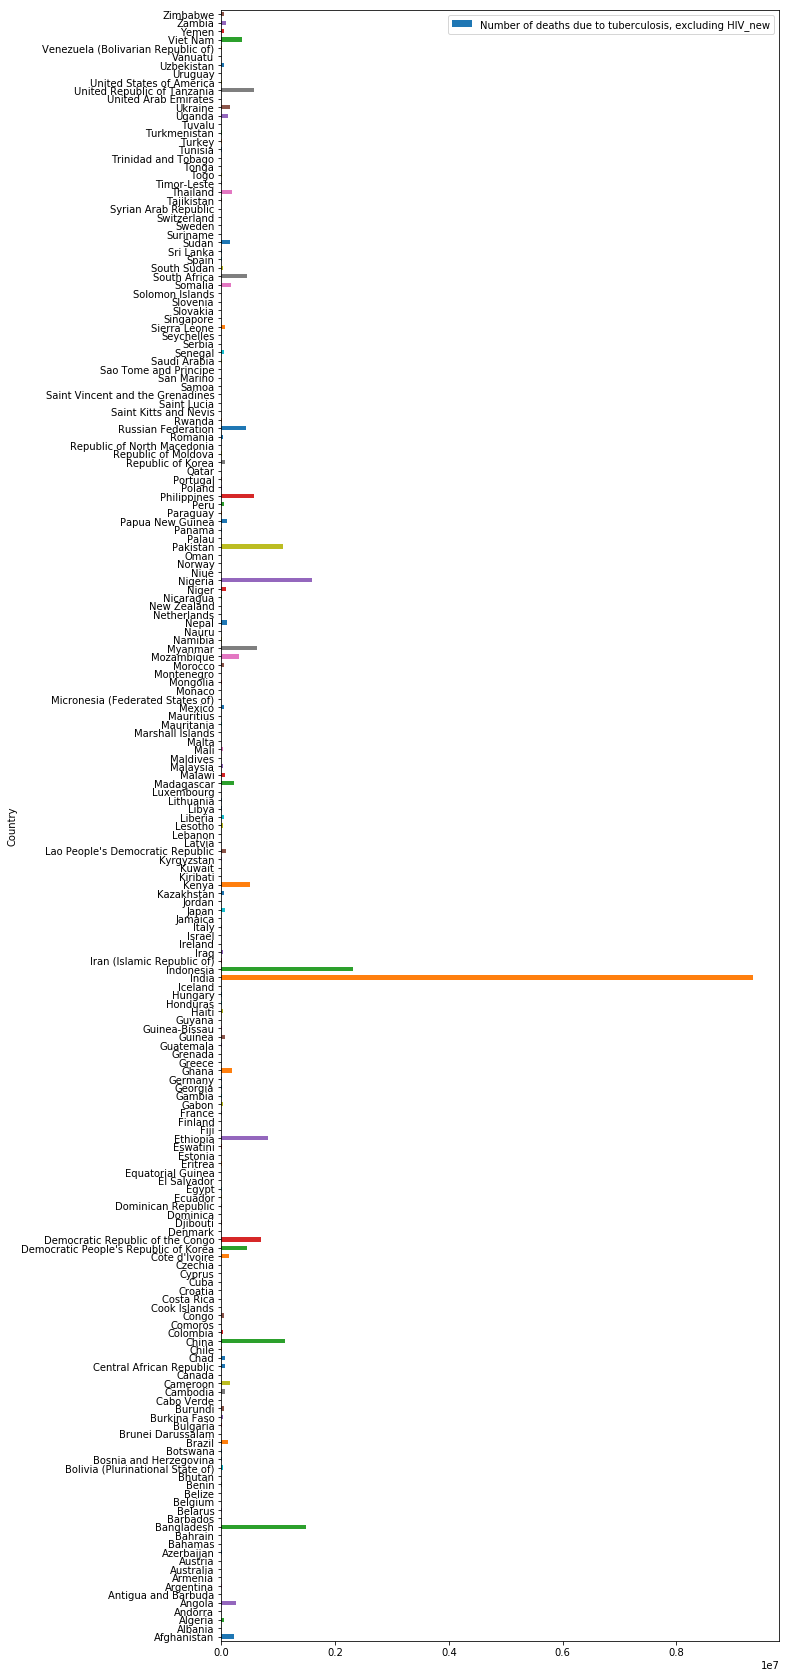

In [11]:
plt.figure()
df1_byCountry = df1.groupby(['Country'])['Number of deaths due to tuberculosis, excluding HIV_new'].sum().astype(int)
df1_byCountry.plot(kind = 'barh', figsize=(10,30), legend=True, fontsize=10)
plt.show()

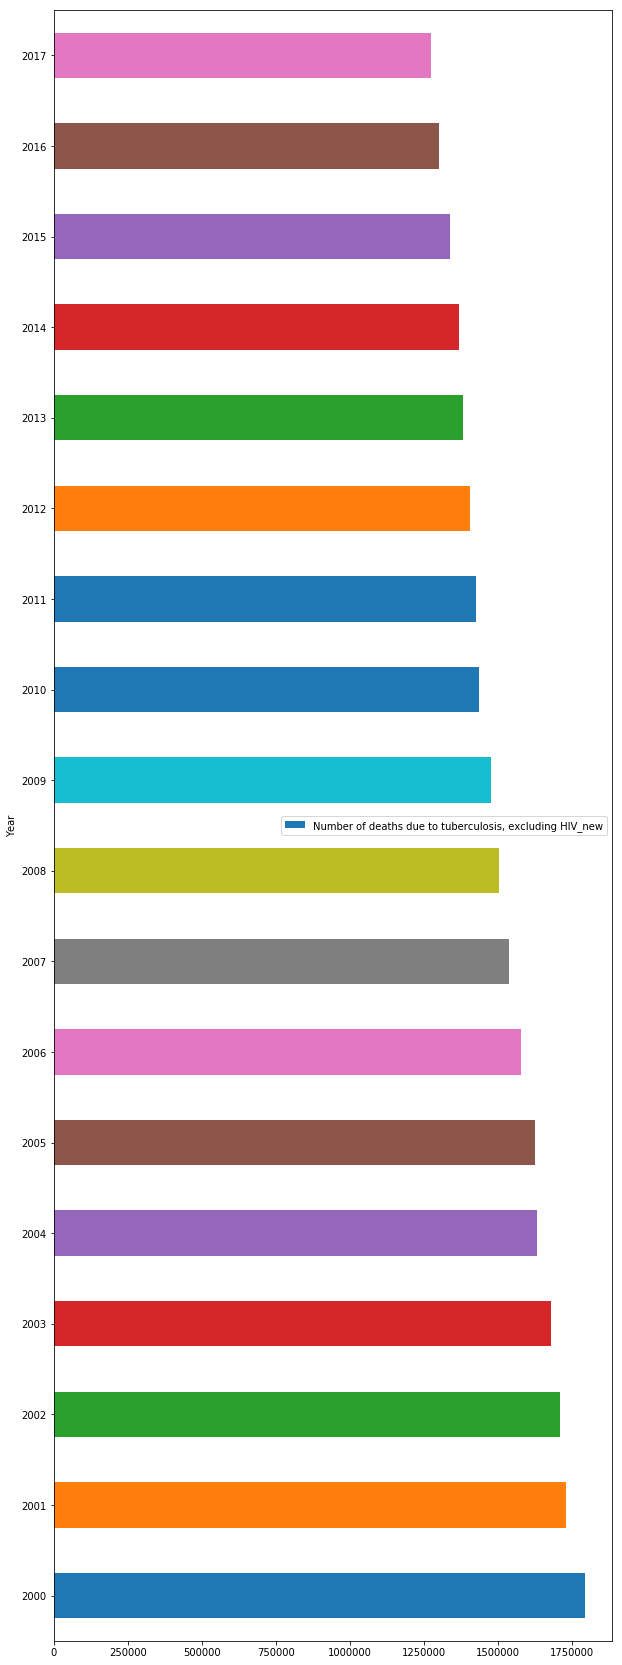

In [21]:
plt.figure()
df1_byCountry = df1.groupby(['Year'])['Number of deaths due to tuberculosis, excluding HIV_new'].sum().astype(int)
df1_byCountry.plot(kind = 'barh',x = 'Year', y='World TB Mortality Rate w/o HIV', figsize=(10,30), legend=True, fontsize=10)
plt.show()

In [13]:
for i in range(0, len(df1['HIV_Mortality_rate'])):
    if df1['HIV_Mortality_rate'][i] == 'No data':
        df1['HIV_Mortality_rate'][i] = 0

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


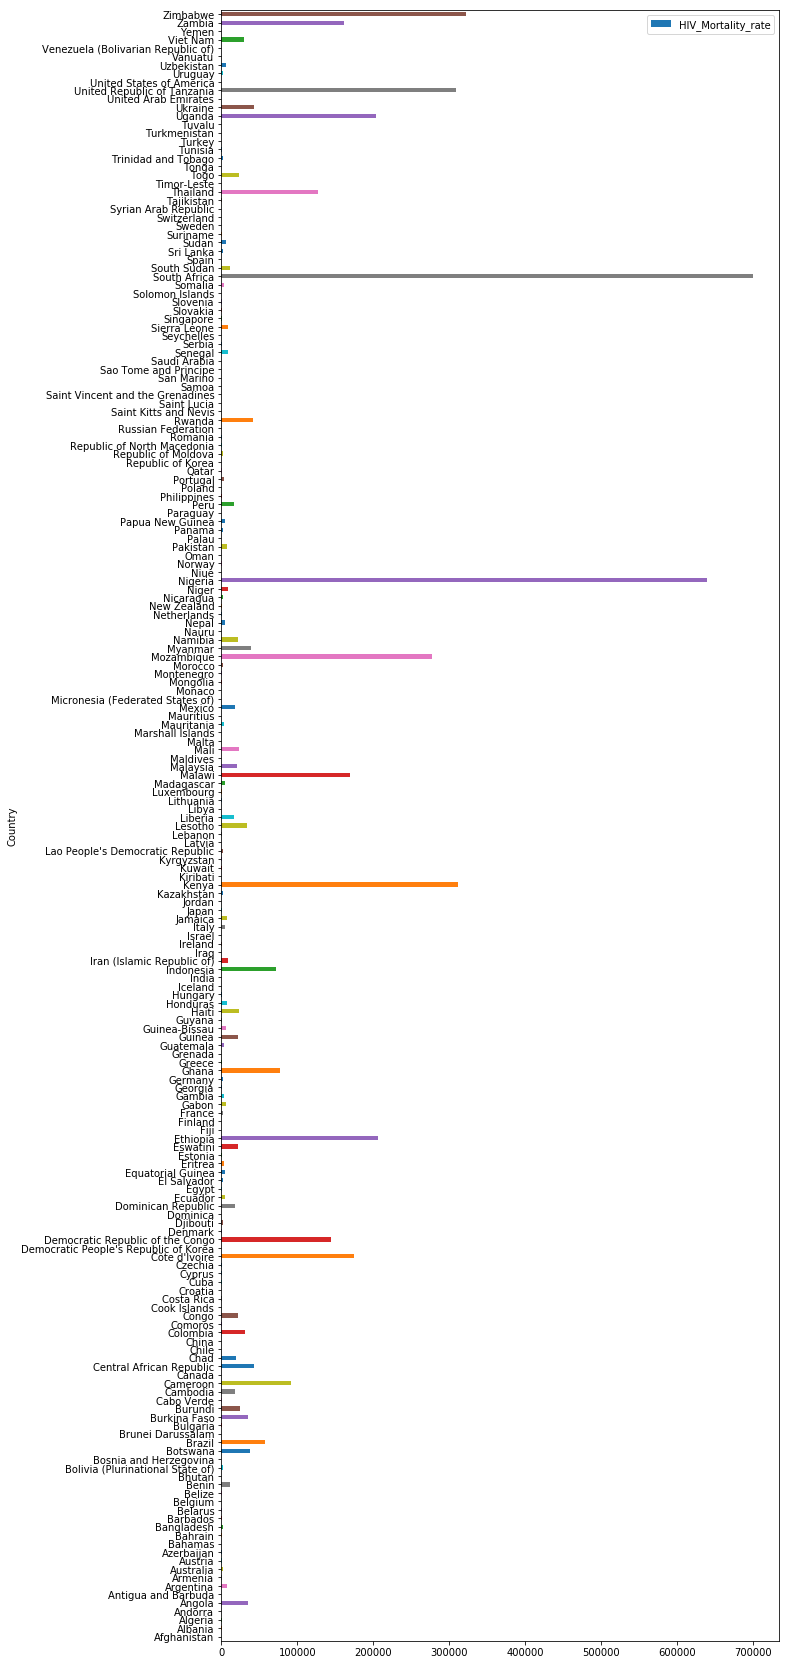

In [14]:
plt.figure()
df1_byCountry = df1.groupby(['Country'])['HIV_Mortality_rate'].sum().astype(int)
df1_byCountry.plot(kind = 'barh',x = 'Country', y='4 yr HIV Mortality Rate', figsize=(10,30), legend=True, fontsize=10)
plt.show()

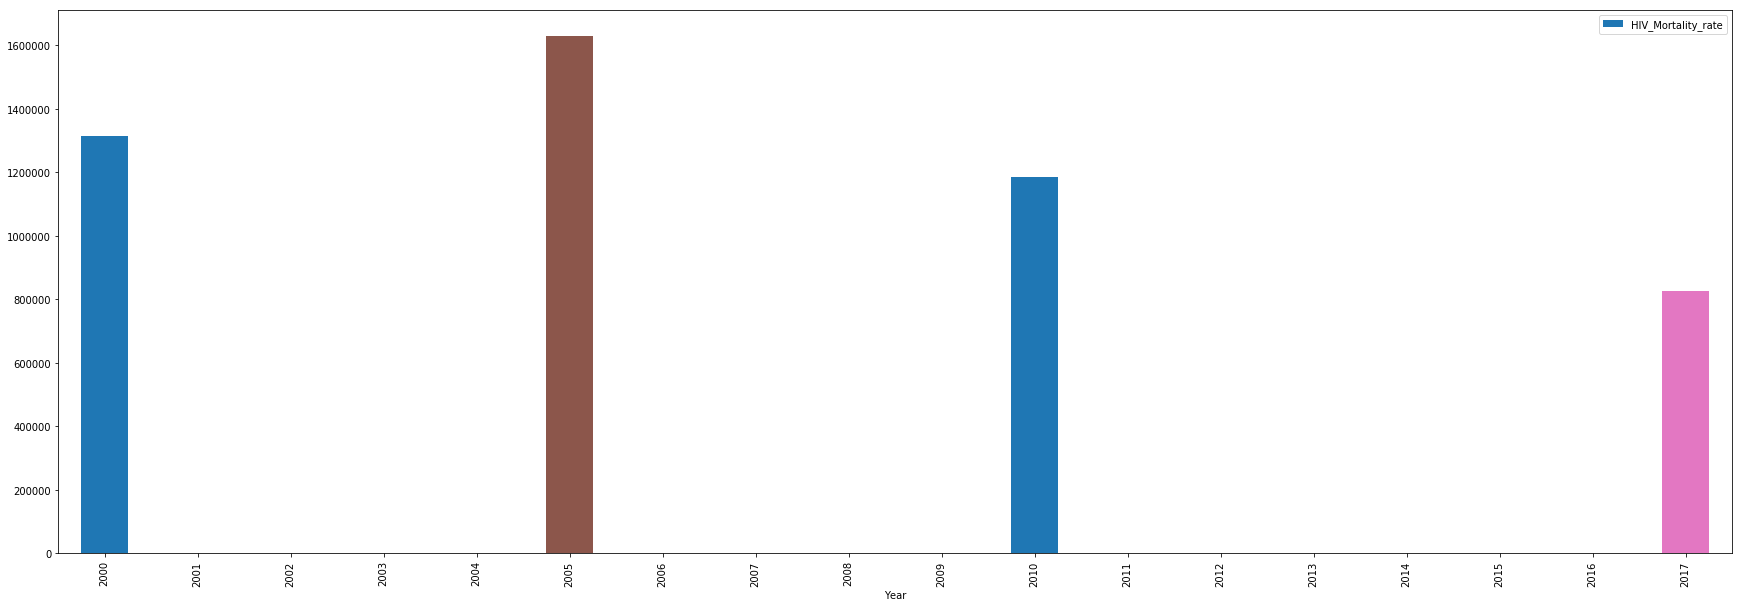

In [15]:
plt.figure()
df1_byCountry = df1.groupby(['Year'])['HIV_Mortality_rate'].sum().astype(int)
df1_byCountry.plot(kind = 'bar',x = 'Year', y='World wide HIV Mortality Rate', figsize=(30,10), legend=True, fontsize=10)
plt.show()

In [16]:
def population():
    a=[]
    for i in range(0, len(df1)):
        a.append(round(df1['Number of deaths due to tuberculosis, excluding HIV_new'][i]*100000
                       /df1['Deaths due to tuberculosis among HIV-negative people (per 100 000 population)_new'][i]))
    return a

df1['Population'] = population()
df1.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


,Country,Year,"Number of deaths due to tuberculosis, excluding HIV_new",Deaths due to tuberculosis among HIV-negative people (per 100 000 population)_new,HIV_Mortality_rate,Population
0,Afghanistan,2017,10000.0,29.0,0,34482759.0
1,Afghanistan,2016,11000.0,33.0,0,33333333.0
2,Afghanistan,2015,13000.0,39.0,0,33333333.0
3,Afghanistan,2014,14000.0,42.0,0,33333333.0
4,Afghanistan,2013,14000.0,43.0,0,32558140.0


In [17]:
from sklearn import preprocessing

df_india = df1[df1['Country'] == 'India']
df_india = df_india.reset_index(drop = True)

df_india

,Country,Year,"Number of deaths due to tuberculosis, excluding HIV_new",Deaths due to tuberculosis among HIV-negative people (per 100 000 population)_new,HIV_Mortality_rate,Population
0,India,2017,410000.0,31.0,0,1.322581e+09
1,India,2016,425000.0,32.0,0,1.328125e+09
2,India,2015,441000.0,34.0,0,1.297059e+09
3,India,2014,456000.0,35.0,0,1.302857e+09
4,India,2013,470000.0,37.0,0,1.270270e+09
5,India,2012,484000.0,38.0,0,1.273684e+09
6,India,2011,497000.0,40.0,0,1.242500e+09
7,India,2010,497000.0,40.0,0,1.242500e+09
8,India,2009,521000.0,43.0,0,1.211628e+09
9,India,2008,532000.0,44.0,0,1.209091e+09


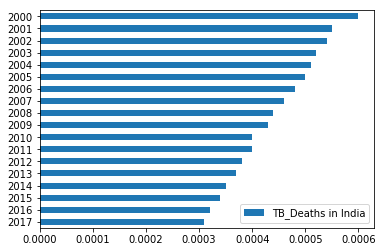

In [18]:
df_india_n = pd.DataFrame({'TB':df_india['Number of deaths due to tuberculosis, excluding HIV_new'], 'Pop':df_india['Population']}, 
                          index = list(range(0, 18)))
for i in range(0, len(df_india_n)):
    df_india_n['TB'][i] = int(df_india_n['TB'][i])
    df_india_n['Pop'][i] = int(df_india_n['Pop'][i])

df_india_n = pd.DataFrame(data=preprocessing.normalize(df_india_n), columns=['TB', 'Pop'])

df_india1 = pd.DataFrame({'TB_Deaths in India': list(df_india_n['TB'])}, index = list(df_india['Year']))

df_india1.plot.barh()

In [19]:
df_sa = df1[df1['Country'] == 'South Africa']
df_sa = df_sa.reset_index(drop = True)

df_sa

,Country,Year,"Number of deaths due to tuberculosis, excluding HIV_new",Deaths due to tuberculosis among HIV-negative people (per 100 000 population)_new,HIV_Mortality_rate,Population
0,South Africa,2017,22000.0,39.0,110000,56410256.0
1,South Africa,2016,22000.0,39.0,0,56410256.0
2,South Africa,2015,22000.0,39.0,0,56410256.0
3,South Africa,2014,22000.0,40.0,0,55000000.0
4,South Africa,2013,22000.0,41.0,0,53658537.0
5,South Africa,2012,22000.0,42.0,0,52380952.0
6,South Africa,2011,23000.0,44.0,0,52272727.0
7,South Africa,2010,24000.0,46.0,200000,52173913.0
8,South Africa,2009,26000.0,50.0,0,52000000.0
9,South Africa,2008,27000.0,54.0,0,50000000.0


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


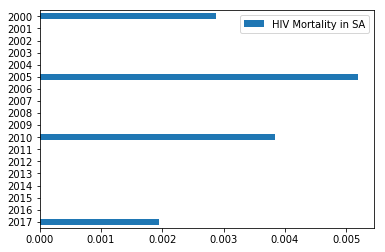

In [20]:
df_sa_n = pd.DataFrame({'HIV':df_sa['HIV_Mortality_rate'], 'Pop':df_sa['Population']}, 
                          index = list(range(0, 18)))
for i in range(0, len(df_sa_n)):
    df_sa_n['HIV'][i] = int(df_sa_n['HIV'][i])
    df_sa_n['Pop'][i] = int(df_sa_n['Pop'][i])

df_sa_n = pd.DataFrame(data=preprocessing.normalize(df_sa_n), columns=['HIV', 'Pop'])

df_sa1 = pd.DataFrame({'HIV Mortality in SA': list(df_sa_n['HIV'])}, index = list(df_sa['Year']))

df_sa1.plot.barh()

In [22]:
df_ng = df1[df1['Country'] == 'Nigeria']
df_ng = df_ng.reset_index(drop = True)

df_ng

,Country,Year,"Number of deaths due to tuberculosis, excluding HIV_new",Deaths due to tuberculosis among HIV-negative people (per 100 000 population)_new,HIV_Mortality_rate,Population
0,Nigeria,2017,120000.0,63.0,150000,190476190.0
1,Nigeria,2016,115000.0,62.0,0,185483871.0
2,Nigeria,2015,113000.0,62.0,0,182258065.0
3,Nigeria,2014,106000.0,60.0,0,176666667.0
4,Nigeria,2013,97000.0,57.0,0,170175439.0
5,Nigeria,2012,92000.0,55.0,0,167272727.0
6,Nigeria,2011,89000.0,55.0,0,161818182.0
7,Nigeria,2010,86000.0,54.0,180000,159259259.0
8,Nigeria,2009,81000.0,53.0,0,152830189.0
9,Nigeria,2008,78000.0,52.0,0,150000000.0


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


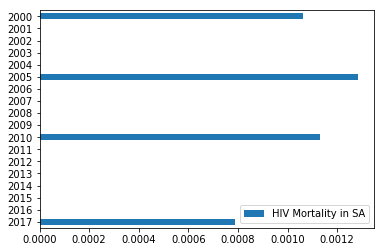

In [27]:
df_ng_n = pd.DataFrame({'HIV':df_ng['HIV_Mortality_rate'], 'Pop':df_ng['Population']}, 
                          index = list(range(0, 18)))
for i in range(0, len(df_ng_n)):
    df_ng_n['HIV'][i] = int(df_ng_n['HIV'][i])
    df_ng_n['Pop'][i] = int(df_ng_n['Pop'][i])

df_ng_n = pd.DataFrame(data=preprocessing.normalize(df_ng_n), columns=['HIV', 'Pop'])

df_ng1 = pd.DataFrame({'HIV Mortality in SA': list(df_ng_n['HIV'])}, index = list(df_ng['Year']))

df_ng1.plot.barh()

### Take away:
- Data Cleaning is as important as visualizations and analysis.
- With the above dataset as example, I was able to know that domain expertise matters and data for one explains many trends in life.